<a href="https://colab.research.google.com/github/jakub-porowski/VideoGamesAnalysis/blob/Workspace/VideoGamesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
def load_data():
    import numpy as np
    import seaborn as sns
    import pandas as pd
    from matplotlib import pyplot as plt
    url = 'https://raw.githubusercontent.com/jakub-porowski/VideoGamesAnalysis/main/vgsales-12-4-2019-short.csv'
    vgs = pd.read_csv(url)

def All_data_description():
  vgs.info()
  print(" ")
  for i in vgs:
    print(vgs[i].describe())
    print(" ")
    
columns = []
def Choose_columns():
  print("Do you want to choose column? ")
  addcolumn = input()
  if addcolumn == "yes":
    print("which one?")
    column=input()
    columns.append(column)
    Choose_columns()

def Show_specific_column_description():
  Choose_columns()
  vgs[columns].info()
  for i in vgs[columns]:
    print(" ")
    print(vgs[i].describe())

def Show_unique_values():
  Choose_columns()
  for i in vgs[columns]:
    print(" ")
    print(vgs[i].unique())

def Show_histogram_per_year():
  Choose_columns()
  columns.append("Year")
  for i in vgs[columns]:
    if i != "Year":
      vgs[columns].hist(column="Year", by=i)
      plt.xticks(rotation=90)
      plt.show()
    else:
      break

def Show_correlation_map():
  corr = vgs.corr()
  f, ax = plt.subplots(figsize=(11, 9))
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Do you want to choose column? 
yes
which one?
ESRB_Rating
Do you want to choose column? 
no


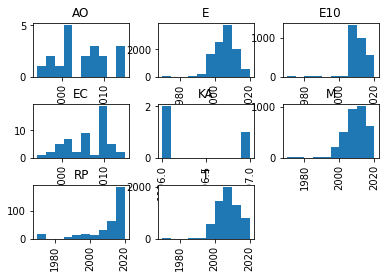

In [32]:
# predict where will be the most sales based on genre,Platform,Global sales, year, highest sell ,,, check kaggle info, 
Show_histogram_per_year()